In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import json
import requests

from functools import reduce
import yfinance as yf

import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

# Import PlotLy Dependencies
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

Stored 'inflation_change_df' (DataFrame)
Average monthly change (%) :-  0.8742381915682175


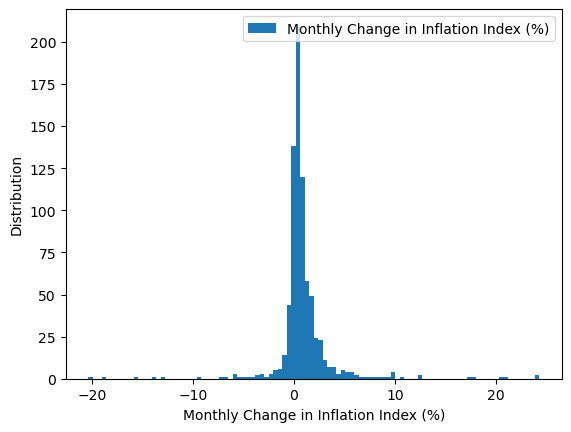

Stored 'productivity_index_monthly_data' (DataFrame)
Average monthly change (%) :-  0.7709840024302399


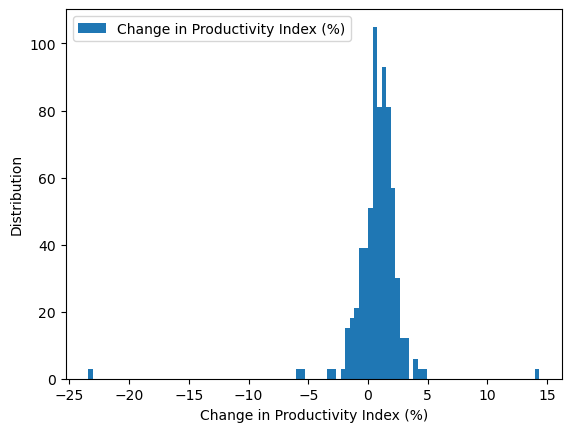

Stored 'gdp_monthly_data' (DataFrame)
Avg. Median Income Change:-  0.6893301036556077
New Datapoint:-  75094.10239130635
Stored 'jobs_index_change_df' (DataFrame)
Average monthly change (%) :-  -0.28359518672663286


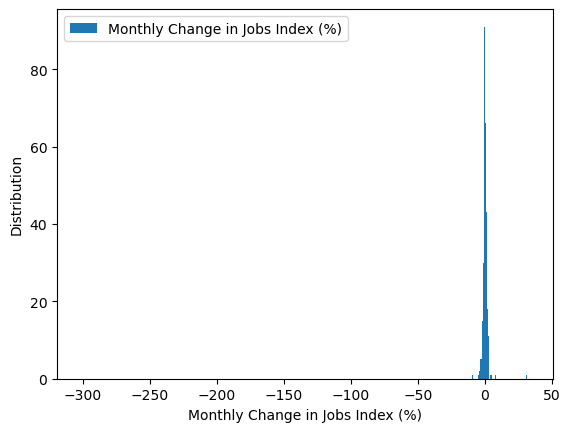

Stored 'housing_monthly_data' (DataFrame)
Average monthly change (%) :-  0.3099293127382854


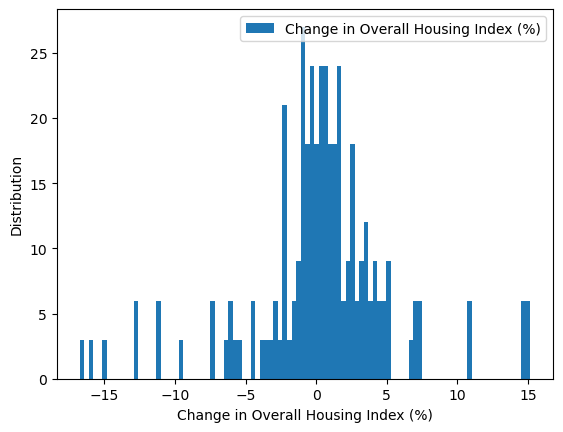

C:\Users\deepe\AppData\Local\Temp\ipykernel_32236\428527774.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Stored 'final_df' (DataFrame)
Length of Features List:   431
Length of Labels List:   431
Stored 'feature_names' (list)
(431, 5) (431,)
Stored 'X' (ndarray)
Stored 'y' (ndarray)
[[ 1.87625140e-02 -1.00605185e-02  9.99773347e-01 -9.52810099e-05
  -1.18846250e-05]
 [-1.79957080e-02  9.97421580e-01  1.03679873e-02 -6.85337423e-02
  -4.68800211e-03]]
[0.9338325  0.03237137]
0.9662038694143176
Stored 'X_pca' (ndarray)


In [2]:
# Run the following Jupyter Notebooks first')

%run x_y_variables.ipynb

In [3]:
# View Data in a DataFrame
final_df

Date  Inflation Change in Velocity (basis points)  \
6   1987-10-01                                    35.021623   
7   1987-11-01                                   -13.680655   
8   1987-12-01                                    -1.993726   
9   1988-01-01                                    39.087556   
10  1988-02-01                                   -40.789498   
..         ...                                          ...   
433 2023-05-01                                   -67.049945   
434 2023-06-01                                    65.926919   
435 2023-07-01                                     1.371959   
436 2023-08-01                                    71.325126   
437 2023-09-01                                   -39.671410   

     Productivity Change in Velocity (basis points)  \
6                                        133.269112   
7                                        133.269112   
8                                        133.269112   
9                                       -254.962627   
10                                      -254.962627   
..                                              ...   
433                                      -79.512028   
434                                      -79.512028   
435                                      170.108596   
436                                      170.108596   
437                                      170.108596   

     Jobs Index Change in Velocity (basis points)  \
6                                      119.636698   
7                                       73.594164   
8                                      -67.057645   
9                                       57.289325   
10                                     -62.295450   
..                                            ...   
433                                   -231.430598   
434                                    232.090468   
435                                     -0.331830   
436                                   -121.993316   
437                                     64.554294   

     Housing Change in Velocity (basis points)  10-Yr Yield (basis points)  \
6                                    71.622075                       952.0   
7                                    71.622075                       886.0   
8                                    71.622075                       899.0   
9                                   -40.312494                       867.0   
10                                  -40.312494                       821.0   
..                                         ...                         ...   
433                                 491.000298                       357.0   
434                                 491.000298                       375.0   
435                                -312.167689                       390.0   
436                                -312.167689                       417.0   
437                                -312.167689                       438.0   

          lock_yn  
6               0  
7               1  
8               0  
9               0  
10              1  
..            ...  
433             1  
434             1  
435             1  
436             1  
437  predict this  

[432 rows x 7 columns]

In [4]:
feature_names


['Inflation Change in Velocity (basis points)',
 'Productivity Change in Velocity (basis points)',
 'Jobs Index Change in Velocity (basis points)',
 'Housing Change in Velocity (basis points)',
 '10-Yr Yield (basis points)']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, shuffle=True, test_size=0.2)
print(X.shape, y.shape)
# X_train

(431, 5) (431,)


In [6]:
# Preprocess to Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train

array([[-0.01428002, -0.18362214,  0.062859  , -0.21281454, -1.15017187],
       [ 0.54170606,  0.11888756,  0.02952788, -0.00224705, -1.30886535],
       [ 0.12380226, -0.55864409, -0.06292475, -0.18228426, -0.74663702],
       ...,
       [ 1.65424393, -0.90289823,  0.061754  , -0.26804614,  0.58638823],
       [-0.25378885,  0.29926173, -0.00476808,  0.19544674,  0.57278593],
       [-0.2345204 , -0.01882137, -0.05613132, -0.18143565, -1.33606995]])

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_dim=5))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [9]:
results = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1000


11/11 [==============================] - 1s 15ms/step - loss: 0.6896 - accuracy: 0.5640 - val_loss: 0.6866 - val_accuracy: 0.5632
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5640 - val_loss: 0.6855 - val_accuracy: 0.5632
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5640 - val_loss: 0.6852 - val_accuracy: 0.5632
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5640 - val_loss: 0.6852 - val_accuracy: 0.5632
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5640 - val_loss: 0.6853 - val_accuracy: 0.5632
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5640 - val_loss: 0.6851 - val_accuracy: 0.5632
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5640 - val_loss: 0.6852 - val_accuracy: 0.5632
Epo

11/11 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.5640 - val_loss: 0.6840 - val_accuracy: 0.5632
Epoch 56/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.5640 - val_loss: 0.6840 - val_accuracy: 0.5632
Epoch 57/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5640 - val_loss: 0.6839 - val_accuracy: 0.5632
Epoch 58/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5640 - val_loss: 0.6840 - val_accuracy: 0.5632
Epoch 59/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5640 - val_loss: 0.6839 - val_accuracy: 0.5632
Epoch 60/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5640 - val_loss: 0.6839 - val_accuracy: 0.5632
Epoch 61/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5640 - val_loss: 0.6839 - val_accuracy: 0.5632
Epoch 62/1000

11/11 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5640 - val_loss: 0.6829 - val_accuracy: 0.5632
Epoch 113/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5640 - val_loss: 0.6829 - val_accuracy: 0.5632
Epoch 114/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5640 - val_loss: 0.6828 - val_accuracy: 0.5632
Epoch 115/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5640 - val_loss: 0.6828 - val_accuracy: 0.5632
Epoch 116/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5640 - val_loss: 0.6828 - val_accuracy: 0.5632
Epoch 117/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5640 - val_loss: 0.6828 - val_accuracy: 0.5632
Epoch 118/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5640 - val_loss: 0.6828 - val_accuracy: 0.5632
Epoch 1

Epoch 169/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5640 - val_loss: 0.6817 - val_accuracy: 0.5632
Epoch 170/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5640 - val_loss: 0.6817 - val_accuracy: 0.5632
Epoch 171/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5640 - val_loss: 0.6817 - val_accuracy: 0.5632
Epoch 172/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5640 - val_loss: 0.6817 - val_accuracy: 0.5632
Epoch 173/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5640 - val_loss: 0.6817 - val_accuracy: 0.5632
Epoch 174/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5640 - val_loss: 0.6818 - val_accuracy: 0.5632
Epoch 175/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5640 - val_loss: 0.6818 - val_accuracy:

Epoch 226/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5640 - val_loss: 0.6806 - val_accuracy: 0.5632
Epoch 227/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5640 - val_loss: 0.6806 - val_accuracy: 0.5632
Epoch 228/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5640 - val_loss: 0.6805 - val_accuracy: 0.5632
Epoch 229/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5640 - val_loss: 0.6806 - val_accuracy: 0.5632
Epoch 230/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5640 - val_loss: 0.6805 - val_accuracy: 0.5632
Epoch 231/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5640 - val_loss: 0.6805 - val_accuracy: 0.5632
Epoch 232/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5640 - val_loss: 0.6805 - val_accuracy:

Epoch 283/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5640 - val_loss: 0.6794 - val_accuracy: 0.5632
Epoch 284/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5669 - val_loss: 0.6793 - val_accuracy: 0.5632
Epoch 285/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5669 - val_loss: 0.6793 - val_accuracy: 0.5632
Epoch 286/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5669 - val_loss: 0.6793 - val_accuracy: 0.5632
Epoch 287/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5669 - val_loss: 0.6793 - val_accuracy: 0.5632
Epoch 288/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5640 - val_loss: 0.6794 - val_accuracy: 0.5632
Epoch 289/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5785 - val_loss: 0.6792 - val_accuracy:

Epoch 340/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5698 - val_loss: 0.6781 - val_accuracy: 0.5632
Epoch 341/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5727 - val_loss: 0.6780 - val_accuracy: 0.5632
Epoch 342/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5785 - val_loss: 0.6780 - val_accuracy: 0.5632
Epoch 343/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5669 - val_loss: 0.6780 - val_accuracy: 0.5632
Epoch 344/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5785 - val_loss: 0.6780 - val_accuracy: 0.5632
Epoch 345/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5669 - val_loss: 0.6779 - val_accuracy: 0.5632
Epoch 346/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5669 - val_loss: 0.6780 - val_accuracy:

Epoch 397/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.5756 - val_loss: 0.6769 - val_accuracy: 0.5747
Epoch 398/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5814 - val_loss: 0.6768 - val_accuracy: 0.5747
Epoch 399/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.5959 - val_loss: 0.6766 - val_accuracy: 0.5632
Epoch 400/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.5872 - val_loss: 0.6766 - val_accuracy: 0.5632
Epoch 401/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5814 - val_loss: 0.6766 - val_accuracy: 0.5632
Epoch 402/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.5843 - val_loss: 0.6769 - val_accuracy: 0.5632
Epoch 403/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5669 - val_loss: 0.6765 - val_accuracy:

Epoch 454/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.5872 - val_loss: 0.6752 - val_accuracy: 0.5632
Epoch 455/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5814 - val_loss: 0.6752 - val_accuracy: 0.5402
Epoch 456/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5814 - val_loss: 0.6751 - val_accuracy: 0.5402
Epoch 457/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5930 - val_loss: 0.6752 - val_accuracy: 0.5632
Epoch 458/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5872 - val_loss: 0.6751 - val_accuracy: 0.5517
Epoch 459/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.5843 - val_loss: 0.6751 - val_accuracy: 0.5632
Epoch 460/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.5843 - val_loss: 0.6751 - val_accuracy:

Epoch 511/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.5930 - val_loss: 0.6738 - val_accuracy: 0.5517
Epoch 512/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6047 - val_loss: 0.6738 - val_accuracy: 0.5517
Epoch 513/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.5785 - val_loss: 0.6737 - val_accuracy: 0.5747
Epoch 514/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6017 - val_loss: 0.6737 - val_accuracy: 0.5632
Epoch 515/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6017 - val_loss: 0.6736 - val_accuracy: 0.5632
Epoch 516/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.5872 - val_loss: 0.6736 - val_accuracy: 0.5517
Epoch 517/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.5959 - val_loss: 0.6736 - val_accuracy:

Epoch 568/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.6076 - val_loss: 0.6725 - val_accuracy: 0.5632
Epoch 569/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6047 - val_loss: 0.6724 - val_accuracy: 0.5517
Epoch 570/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5988 - val_loss: 0.6725 - val_accuracy: 0.5862
Epoch 571/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.5872 - val_loss: 0.6724 - val_accuracy: 0.5632
Epoch 572/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.5901 - val_loss: 0.6725 - val_accuracy: 0.5632
Epoch 573/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.6017 - val_loss: 0.6724 - val_accuracy: 0.5632
Epoch 574/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.5930 - val_loss: 0.6724 - val_accuracy:

Epoch 625/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6047 - val_loss: 0.6718 - val_accuracy: 0.5862
Epoch 626/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.5959 - val_loss: 0.6718 - val_accuracy: 0.5862
Epoch 627/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.5988 - val_loss: 0.6718 - val_accuracy: 0.5862
Epoch 628/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6047 - val_loss: 0.6719 - val_accuracy: 0.5862
Epoch 629/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6047 - val_loss: 0.6718 - val_accuracy: 0.5862
Epoch 630/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6047 - val_loss: 0.6718 - val_accuracy: 0.5862
Epoch 631/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5959 - val_loss: 0.6719 - val_accuracy:

Epoch 682/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.5930 - val_loss: 0.6721 - val_accuracy: 0.5977
Epoch 683/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6192 - val_loss: 0.6723 - val_accuracy: 0.5632
Epoch 684/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6163 - val_loss: 0.6724 - val_accuracy: 0.5632
Epoch 685/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6076 - val_loss: 0.6725 - val_accuracy: 0.5632
Epoch 686/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.6047 - val_loss: 0.6722 - val_accuracy: 0.5977
Epoch 687/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.6221 - val_loss: 0.6722 - val_accuracy: 0.5862
Epoch 688/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6192 - val_loss: 0.6723 - val_accuracy:

Epoch 739/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6134 - val_loss: 0.6739 - val_accuracy: 0.5747
Epoch 740/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.6047 - val_loss: 0.6739 - val_accuracy: 0.5747
Epoch 741/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6134 - val_loss: 0.6739 - val_accuracy: 0.5747
Epoch 742/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6192 - val_loss: 0.6741 - val_accuracy: 0.5747
Epoch 743/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.6134 - val_loss: 0.6740 - val_accuracy: 0.5747
Epoch 744/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6192 - val_loss: 0.6739 - val_accuracy: 0.5747
Epoch 745/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.6134 - val_loss: 0.6741 - val_accuracy:

Epoch 796/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6192 - val_loss: 0.6774 - val_accuracy: 0.5747
Epoch 797/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.6105 - val_loss: 0.6771 - val_accuracy: 0.5747
Epoch 798/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6105 - val_loss: 0.6769 - val_accuracy: 0.5747
Epoch 799/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6163 - val_loss: 0.6772 - val_accuracy: 0.5747
Epoch 800/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6526 - accuracy: 0.6163 - val_loss: 0.6773 - val_accuracy: 0.5747
Epoch 801/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6134 - val_loss: 0.6773 - val_accuracy: 0.5747
Epoch 802/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6163 - val_loss: 0.6778 - val_accuracy:

Epoch 853/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.6105 - val_loss: 0.6810 - val_accuracy: 0.5632
Epoch 854/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6163 - val_loss: 0.6816 - val_accuracy: 0.5747
Epoch 855/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.6221 - val_loss: 0.6817 - val_accuracy: 0.5747
Epoch 856/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.6076 - val_loss: 0.6818 - val_accuracy: 0.5747
Epoch 857/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.6105 - val_loss: 0.6818 - val_accuracy: 0.5747
Epoch 858/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.6134 - val_loss: 0.6815 - val_accuracy: 0.5747
Epoch 859/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.6134 - val_loss: 0.6814 - val_accuracy:

Epoch 910/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6526 - accuracy: 0.5988 - val_loss: 0.6859 - val_accuracy: 0.5632
Epoch 911/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.6105 - val_loss: 0.6861 - val_accuracy: 0.5632
Epoch 912/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6501 - accuracy: 0.6221 - val_loss: 0.6853 - val_accuracy: 0.5517
Epoch 913/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6105 - val_loss: 0.6858 - val_accuracy: 0.5632
Epoch 914/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6017 - val_loss: 0.6860 - val_accuracy: 0.5747
Epoch 915/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6134 - val_loss: 0.6860 - val_accuracy: 0.5747
Epoch 916/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6076 - val_loss: 0.6857 - val_accuracy:

Epoch 967/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6105 - val_loss: 0.6893 - val_accuracy: 0.5517
Epoch 968/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6134 - val_loss: 0.6895 - val_accuracy: 0.5517
Epoch 969/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6047 - val_loss: 0.6896 - val_accuracy: 0.5402
Epoch 970/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6105 - val_loss: 0.6896 - val_accuracy: 0.5517
Epoch 971/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6047 - val_loss: 0.6894 - val_accuracy: 0.5632
Epoch 972/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.6105 - val_loss: 0.6892 - val_accuracy: 0.5517
Epoch 973/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6076 - val_loss: 0.6894 - val_accuracy:

In [10]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

11/11 [==============================] - 0s 897us/step - loss: 0.6474 - accuracy: 0.6163
Train score: [0.6474147439002991, 0.6162790656089783]
3/3 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5517
Test score: [0.6913714408874512, 0.5517241358757019]


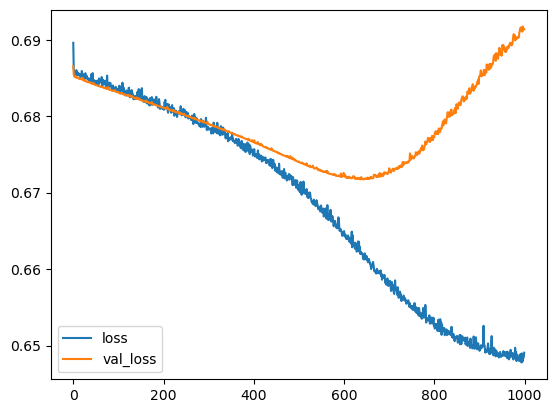

In [11]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.legend()


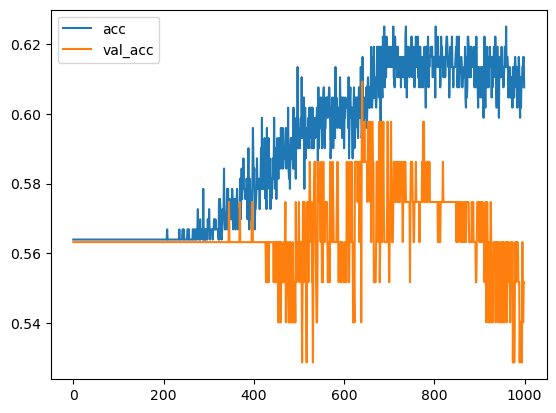

In [12]:
# Plot the accuracy too
plt.plot(results.history['accuracy'], label='acc')
plt.plot(results.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# Make predictions
P = model.predict(X_test)
# print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

3/3 [==============================] - 0s 1ms/step
[0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1.]


In [16]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.5517241379310345
3/3 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5517
Evaluate output: [0.6913714408874512, 0.5517241358757019]


In [15]:
# Enter the new independent variables, standard scale it and predict decision
new_data = scaler.transform((np.array([[-42.802841, 118.172447, 64.554294, -1.073848, 438.0 ]])))
new_data_prediction = model.predict(new_data)
new_data_prediction = np.round(new_data_prediction).flatten()
new_data_prediction


1/1 [==============================] - 0s 13ms/step


array([0.], dtype=float32)

###### Still basically a coin toss